In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pandas.plotting import autocorrelation_plot

In [2]:
file_path = 'IBM.csv'  # Make sure to update the path to where you've stored your file
data = pd.read_csv(file_path)


In [3]:
# Preprocess the data by selecting only the 'Close' price
close_prices = data['Close'].values.reshape(-1, 1)

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [5]:
# Prepare the sequences used by the LSTM model
def create_dataset(dataset, look_back=10):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [6]:
# Create input features and labels
look_back = 10
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle=False)

In [8]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\srini\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0330 - val_loss: 0.0466
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0042 - val_loss: 0.0307
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0034 - val_loss: 0.0157
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - val_loss: 0.0050
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - val_loss: 0.0033
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0021 - val_loss: 0.0050
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/ste

In [10]:
# Evaluate the model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)

In [11]:
# Predict future values
predicted = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step


In [12]:
# Inverse transform to get actual values
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(Y_test.reshape(-1, 1))


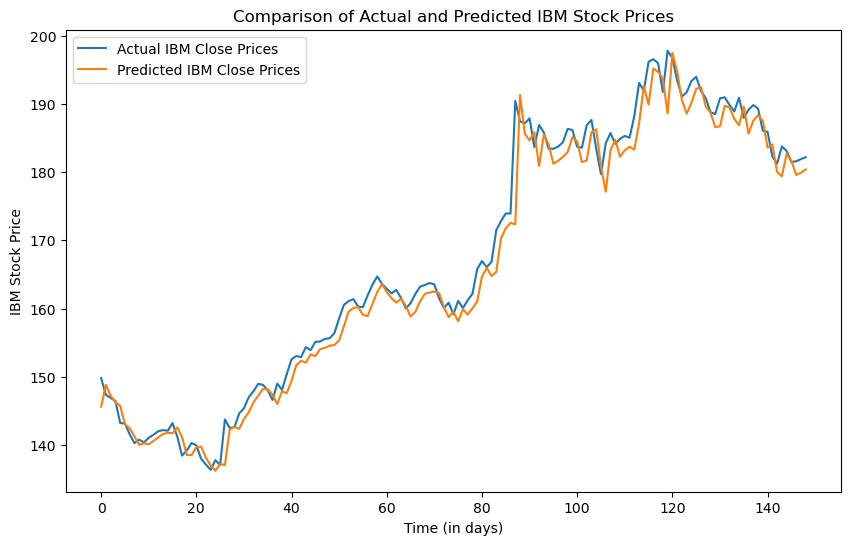

In [13]:
# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(real_prices, label='Actual IBM Close Prices')
plt.plot(predicted_prices, label='Predicted IBM Close Prices')
plt.title('Comparison of Actual and Predicted IBM Stock Prices')
plt.xlabel('Time (in days)')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

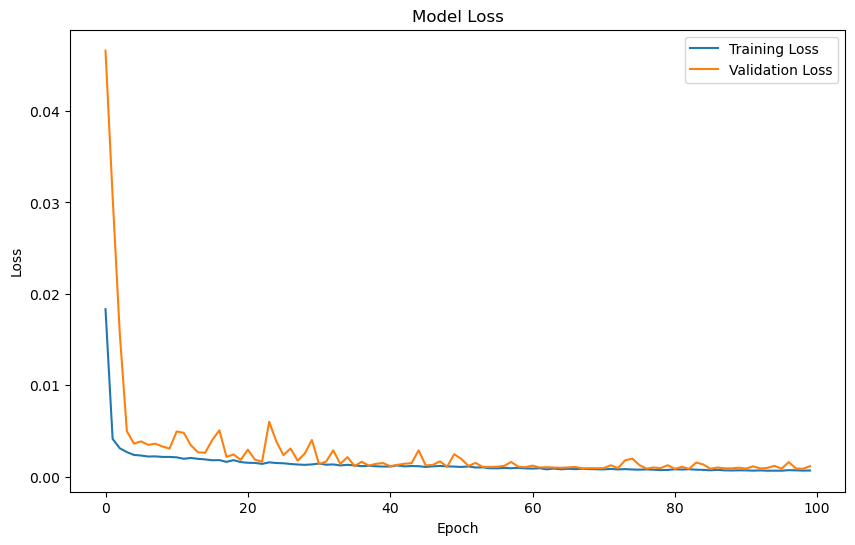

In [14]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

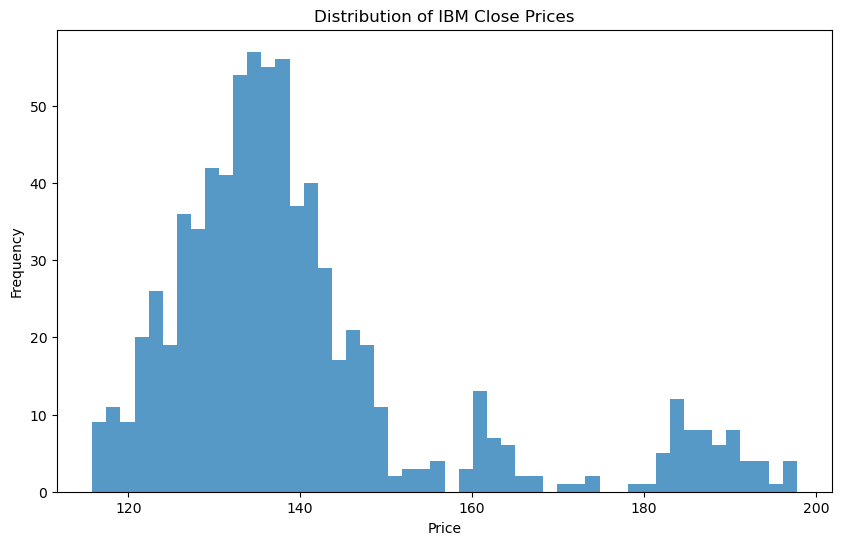

In [15]:
# Distribution of Close Prices
plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, alpha=0.75)
plt.title('Distribution of IBM Close Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

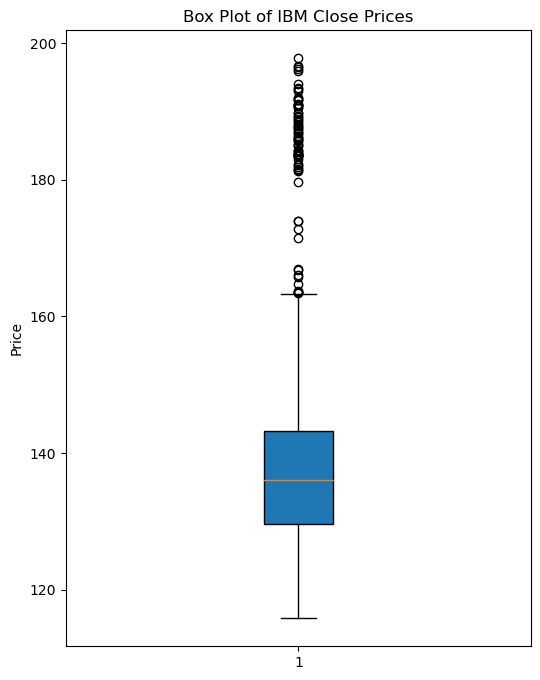

In [16]:
# Visualization 4: Box Plot of Close Prices
plt.figure(figsize=(6, 8))
plt.boxplot(data['Close'], vert=True, patch_artist=True)
plt.title('Box Plot of IBM Close Prices')
plt.ylabel('Price')
plt.show()

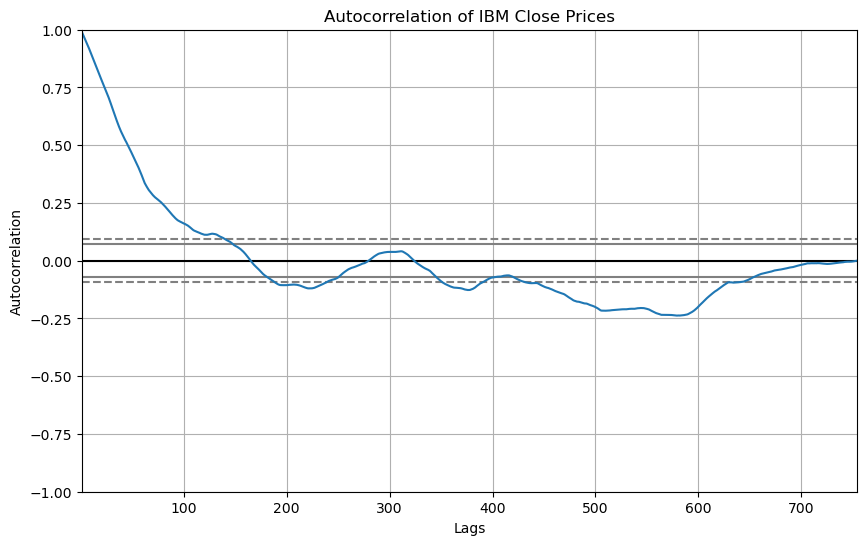

In [17]:
# Visualization 5: Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation of IBM Close Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()